In [299]:
import pandas as pd
import numpy as np
from plotnine import *

In [300]:
train = pd.read_csv('train.csv')
train.shape

(891, 12)

In [301]:
test = pd.read_csv('test.csv')
test.shape

(418, 11)

In [302]:
# df.column = ['', '', '', '', '', '']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [303]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [304]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [305]:
# age_mean 칼럼 생성
train['Age_mean'] = train['Age']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [306]:
# 평균값으로 age null값 대체
train['Age_mean'].fillna(train['Age'].mean(), inplace=True)

In [307]:
test['Age_mean'] = test['Age']
test['Age_mean'].fillna(test['Age'].mean(), inplace=True)

In [308]:
# age의 177개 null값이 age mean에서는 모두 채워짐을 알 수 있다. 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
dtype: int64

In [309]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age_mean         0
dtype: int64

# One-hot-encoding (범주형 -> 수치형)

In [310]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [311]:
# sex_e 칼럼에 female은 true, male은 false로 넣어주기
train['Sex_E'] = train['Sex'] == 'female'
test['Sex_E'] = test['Sex'] == 'female'
train['Sex_E'].head()

0    False
1     True
2     True
3     True
4    False
Name: Sex_E, dtype: bool

In [312]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [313]:
train['Embarked'].isnull().sum()

2

In [314]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [315]:
test['Embarked'].isnull().sum()

0

In [316]:
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_Q'] = train['Embarked'] == 'Q'
#Embarked 칼럼값이 S면 True값을 가지고 아니면 False인 Embarked_S라는 새 칼럼이 생성됨

In [317]:
train['Embarked_S'].sum()


644

In [318]:
train['Embarked_C'].sum()


168

In [319]:
train['Embarked_Q'].sum()

77

In [320]:
train[['Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q']].head()
# 이진값, 수치형으로 만들려면 int변환 하면됨.

,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,S,True,False,False
1,C,False,True,False
2,S,True,False,False
3,S,True,False,False
4,S,True,False,False


In [321]:
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_Q'] = test['Embarked'] == 'Q'

In [322]:
test['Embarked_S'].sum()

270

In [323]:
test['Embarked_C'].sum()

102

In [324]:
test['Embarked_Q'].sum()

46

In [325]:
test[['Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q']].head()
# 이진값, 수치형으로 만들려면 int변환 하면됨.

,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,Q,False,False,True
1,S,True,False,False
2,Q,False,False,True
3,S,True,False,False
4,S,True,False,False


# 가족 수 구하기 (비연속형 수치 -> 카테고리화 -> 이진 수치)
## : binning (bucketing)

In [326]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Sex_E',
       'Embarked_S', 'Embarked_C', 'Embarked_Q'],
      dtype='object')

In [327]:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1

In [328]:
train['FamilySize'].value_counts()
#해당 칼럼의 결과값 별 갯수

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [336]:
train['Family'] = train["FamilySize"]
train.loc[train['FamilySize'] == 1, 'Family'] = 'S'
train.loc[(train['FamilySize'] > 1) & (train['FamilySize'] <= 4), 'Family'] = 'M'
train.loc[train['FamilySize'] > 4, 'Family'] = 'L'

In [337]:
train[['Family', 'FamilySize']].head()

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1


In [338]:
train['Family_S'] = train['Family'] == 'S'
train['Family_M'] = train['Family'] == 'M'
train['Family_L'] = train['Family'] == 'L'

In [339]:
train[['FamilySize', 'Family', 'Family_S', 'Family_M', 'Family_L']].head()

,FamilySize,Family,Family_S,Family_M,Family_L
0,2,M,False,True,False
1,2,M,False,True,False
2,1,S,True,False,False
3,2,M,False,True,False
4,1,S,True,False,False


In [340]:
test['FamilySize'] = test['Parch'] + test['SibSp'] + 1
test['FamilySize'].value_counts()

test['Family'] = test["FamilySize"]
test.loc[test['FamilySize'] == 1, 'Family'] = 'S'
test.loc[(test['FamilySize'] > 1) & (test['FamilySize'] <= 4), 'Family'] = 'M'
test.loc[test['FamilySize'] > 4 , 'Family'] = 'L'

test['Family_S'] = test['Family'] == 'S'
test['Family_M'] = test['Family'] == 'M'
test['Family_L'] = test['Family'] == 'L'

In [341]:
test[['Family', 'Family_S', 'Family_M', 'Family_L', 'FamilySize']].head()

,Family,Family_S,Family_M,Family_L,FamilySize
0,S,True,False,False,1
1,M,False,True,False,2
2,S,True,False,False,1
3,S,True,False,False,1
4,M,False,True,False,3


In [342]:
train['Family'].value_counts()

S    537
M    292
L     62
Name: Family, dtype: int64

In [343]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Sex_E',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L'],
      dtype='object')

In [344]:
!pip install graphviz

In [345]:
from sklearn.tree import export_graphviz
import graphviz


In [358]:
feature_names = ['Sex_E', 'Age_mean', 'Fare',
                 'Embarked_S', 'Embarked_C', 'Embarked_Q',
                'Family_S', 'Family_M', 'Family_L']

In [359]:
train['Fare'].fillna(train['Fare'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
Sex_E            0
Embarked_S       0
Embarked_C       0
Embarked_Q       0
FamilySize       0
Family           0
Family_S         0
Family_M         0
Family_L         0
dtype: int64

In [360]:
train = train
X_train = train[feature_names]
X_train.head()
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_mean,Sex_E,Embarked_S,Embarked_C,Embarked_Q,FamilySize,Family,Family_S,Family_M,Family_L
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22.000000,False,True,False,False,2,M,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38.000000,True,False,True,False,2,M,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26.000000,True,True,False,False,1,S,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,35.000000,True,True,False,False,2,M,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,35.000000,False,True,False,False,1,S,True,False,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,29.699118,False,False,False,True,1,S,True,False,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,54.000000,False,True,False,False,1,S,True,False,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,2.000000,False,True,False,False,5,L,False,False,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,27.000000,True,True,False,False,3,M,False,True,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,14.000000,True,False,True,False,2,M,False,True,False


In [361]:
y_label = train['Survived']

In [362]:
X_test = test[feature_names]

In [363]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6, random_state=2018)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

In [364]:
model.fit(X_train, y_label)
prediction = model.predict(X_test)

score = round(model.score(X_train, y_label)*100, 2)
print(score)

86.87


In [365]:
submission = pd.DataFrame(prediction).reset_index()
submission.columns = ['PassengerId', 'Survived']
submission['PassengerId'] = test['PassengerId']
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [366]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
    
# !pip install graphviz

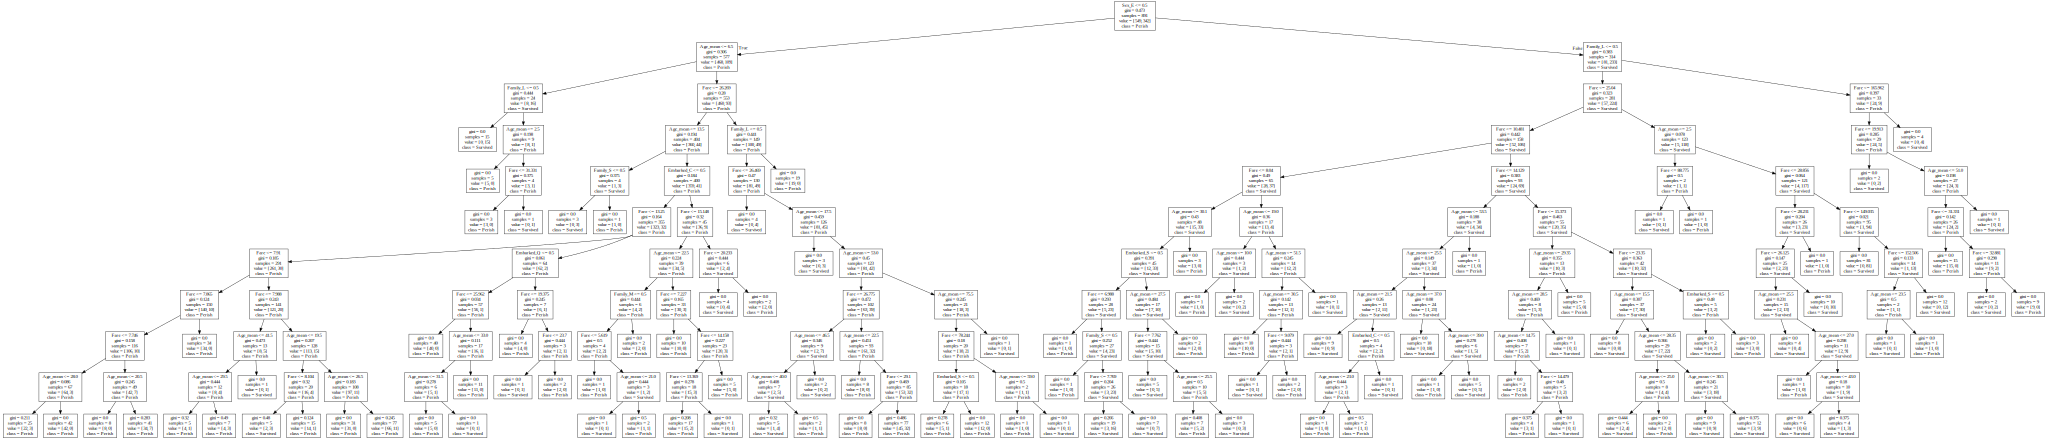

In [211]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)